In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy import linalg as LA
import os
import pandas as pd
from sklearn.externals import joblib

c:\users\ohohk\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data_loc = '../dataset/'
decklist = os.listdir(data_loc)
filelist = os.listdir(data_loc+decklist[0]+'/')

length = len(decklist)*len(filelist)
imgary = np.zeros((length, 30*20))
labels = []
n=0
for i in decklist:
    for j in filelist:
        tmpimg = cv2.imread(data_loc+i+'/'+j, cv2.IMREAD_GRAYSCALE)
        tmpimg = tmpimg[90:120,80:100]
        tmpimg = np.reshape(tmpimg, (-1,))
        imgary[n] = tmpimg
        labels.append(j[:-4])
        n+=1

In [3]:
labels_shape =  [name[0]for name in labels]
labels_num =  [name[1:]for name in labels]
labels_shape_pd = pd.DataFrame(labels_shape)
labels_num_pd = pd.DataFrame(labels_num)

## 층화추출

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [5]:
for train_index, test_index in split.split(imgary, labels_shape):
    X_train_shape = imgary[train_index]
    y_train_shape = labels_shape_pd.loc[train_index]
    X_test_shape = imgary[test_index]
    y_test_shape = labels_shape_pd.loc[test_index]

In [6]:
for train_index, test_index in split.split(imgary, labels_num):
    X_train_num = imgary[train_index]
    y_train_num = labels_num_pd.loc[train_index]
    X_test_num = imgary[test_index]
    y_test_num = labels_num_pd.loc[test_index]

In [7]:
y_train_shape = np.array(y_train_shape).reshape(-1,)
y_test_shape = np.array(y_test_shape).reshape(-1,)
y_train_num = np.array(y_train_num).reshape(-1,)
y_test_num = np.array(y_test_num).reshape(-1,)

In [8]:
from sklearn.svm import SVC
svc_shape_raw = SVC(kernel = 'linear', C=1, gamma = 'auto', random_state=42)
svc_shape_raw.fit(X_train_shape, y_train_shape)
y_pred_shape = svc_shape_raw.predict(X_test_shape)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test_shape), (y_test_shape !=y_pred_shape).sum()))
print('정답률 : %f' %((y_test_shape ==y_pred_shape).sum()/len(y_test_shape)))

총 테스트 개수 : 52, 오류개수 : 2
정답률 : 0.961538


*****************
label : C
predict : D
*****************
label : S
predict : C


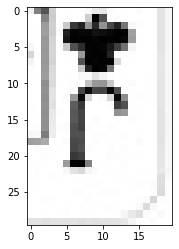

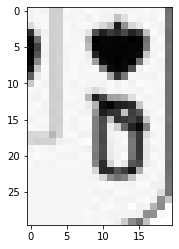

In [9]:
false_x = X_test_shape[y_test_shape !=y_pred_shape]
false_y = y_test_shape[y_test_shape !=y_pred_shape]
false_p = y_pred_shape[y_test_shape !=y_pred_shape]
for index in range(len(false_x)):
    print("*****************")
    print("label : %c" % false_y[index])
    print("predict : %c" % false_p[index])
    plt.figure()
    plt.imshow(false_x[index].reshape(30,20), cmap='gray')

In [12]:
joblib.dump(svc_shape_raw, 'svc_shape_raw_small.pkl') 

['svc_shape_raw_small.pkl']

In [27]:
from sklearn.linear_model import LogisticRegression
lr_shape_raw = LogisticRegression(solver='liblinear', multi_class='auto', C=100, random_state=42)
lr_shape_raw.fit(X_train_shape, y_train_shape)
y_pred_shape = lr_shape_raw.predict(X_test_shape)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test_shape), (y_test_shape !=y_pred_shape).sum()))
print('정답률 : %f' %((y_test_shape ==y_pred_shape).sum()/len(y_test_shape)))

총 테스트 개수 : 52, 오류개수 : 1
정답률 : 0.980769


*****************
label : S
predict : C


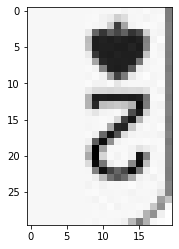

In [28]:
false_x = X_test_shape[y_test_shape !=y_pred_shape]
false_y = y_test_shape[y_test_shape !=y_pred_shape]
false_p = y_pred_shape[y_test_shape !=y_pred_shape]
for index in range(len(false_x)):
    print("*****************")
    print("label : %c" % false_y[index])
    print("predict : %c" % false_p[index])
    plt.figure()
    plt.imshow(false_x[index].reshape(30,20), cmap='gray')

In [30]:
from sklearn.svm import SVC
svc_num_raw = SVC(kernel = 'linear', C=1.0, gamma = 'auto', random_state=42)
svc_num_raw.fit(X_train_num, y_train_num)
y_pred_num = svc_num_raw.predict(X_test_num)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test_num), (y_test_num !=y_pred_num).sum()))
print('정답률 : %f' %((y_test_num ==y_pred_num).sum()/len(y_test_num)))

총 테스트 개수 : 52, 오류개수 : 22
정답률 : 0.576923


In [37]:
lr_num_raw = LogisticRegression(solver='liblinear', multi_class='auto', C=1.0, random_state=42)
lr_num_raw.fit(X_train_num, y_train_num)
y_pred_num = lr_num_raw.predict(X_test_num)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test_num), (y_test_num !=y_pred_num).sum()))
print('정답률 : %f' %((y_test_num ==y_pred_num).sum()/len(y_test_num)))

총 테스트 개수 : 52, 오류개수 : 21
정답률 : 0.596154


svc :  ['S'] ['10']


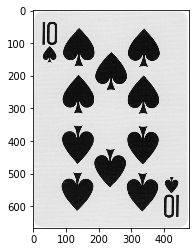

In [21]:
test_img = cv2.imread('spade10.jpg', cv2.IMREAD_GRAYSCALE)
img_resize = cv2.resize(test_img, (100, 120), interpolation=cv2.INTER_AREA)
img_resize = img_resize[90:120,80:100]
img_resize = img_resize.reshape((1,-1))
plt.imshow(test_img, cmap='gray')
print("svc : ",svc_shape_raw.predict(img_resize),svc_num_raw.predict(img_resize))
#print("logistic regression : ",lr_shape_raw.predict(img_resize),lr_num_raw.predict(img_resize))

svc :  ['C'] ['K']


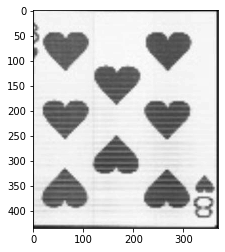

In [22]:
test_img = cv2.imread('heart8.jpg', cv2.IMREAD_GRAYSCALE)
img_resize = cv2.resize(test_img, (100, 120), interpolation=cv2.INTER_AREA)
img_resize = img_resize[90:120,80:100]
img_resize = img_resize.reshape((1,-1))
plt.imshow(test_img, cmap='gray')
print("svc : ",svc_shape_raw.predict(img_resize),svc_num_raw.predict(img_resize))
#print("logistic regression : ",lr_shape_raw.predict(img_resize),lr_num_raw.predict(img_resize))